<center>
    <h1> Geoelectrics: Geometric factor, apparent resistivity and electrical pseudosections</h1>
<div class="alert alert-info">
<h4>Geophysical Imaging and Montoring (GIM)<br> SoSe24</h4>
    
| Contact | Email   |
|----|---|
| Prof. Dr. Florian Wagner  | <fwagner@gim.rwth-aachen.de> |
</center>

In this exercise we want to deepen or understanding of some of the terms introduced in the geoelectrics lecture.
In doing so, **we will not use pyGIMLi, but work with numpy and matplotlib only.**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

The **geometric factor** is defined as:

$$K = \frac{2\pi}{(\frac{1}{r_{AM}}-\frac{1}{r_{AN}}-\frac{1}{r_{BM}}+\frac{1}{r_{BN}})}$$

It corrects for the decrease of the signal with increasing electrode separations. It allows to calculate an **apparent resistivity** $\rho_a = K \frac{U_{MN}}{I}$ of the subsurface for a given measurement (i.e. the resistivity of a homogeneous subsurface that would lead to the corresponding voltage measurement $U_{MN}$ between electrodes M and N for a given current $I$). Apparent resistivities are displayed in a **pseudosection**.

To gain intuition on pseudosections, look at the following video:

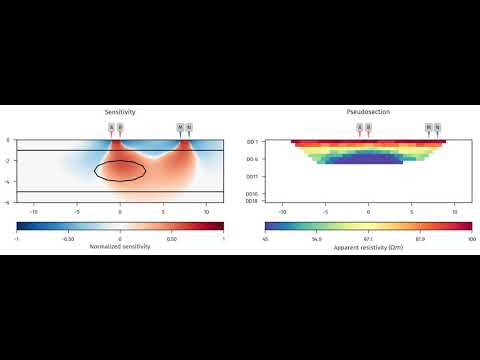

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo("lt1qV-2d5Ps")

The left-hand side shows the sensitivity of a dipole-dipole measurement with increasing dipole separations. The sensitivity shows how regions of the subsurface affect the measurement, i.e. where the measurement is sensitive. Sensitivity quickly drops away from the electrodes leading to a loss of resolution with depth. The right-hand side is what we will focus on today. The pseudosection is basically a color-coded table of the measurements. While it is not suitable for interpretations, it is very powerful in examining measurement quality.

### Solutions:

a) Create an array with 13 electrodes spaced by 1.5 m ranging from $x = 0$ m to $x=18$ m.

In [3]:
elecs = np.arange(13) * 1.5
print(elecs)

[ 0.   1.5  3.   4.5  6.   7.5  9.  10.5 12.  13.5 15.  16.5 18. ]


b) Create a numpy array with four columns (A, B, M, N) containing the measurement protocol of a complete dipole-dipole survey with a dipole length of the unit electrode spacing, but all possible separations between two dipoles. The first row would be `0 1 2 3` (which would correspond to the first measurement in the video above), the second row would be `0 1 3 4`, etc. Do not include any reciprocal measurements, i.e. measurements where A & B are interchanged with M & N. The complete array should have 55 rows.

In [4]:
measurements = [] # Start with empty list

# for loop to vary the current injection (A and B)
for a in range(10): # leave out last three electrodes for B, M and N
    b = a + 1 # b is always next to a
    for increase in range(10 - a): # inner loop changing potential dipole
        m = b + 1 + increase
        n = m + 1 # n is always next to m
        measurements.append((a, b, m, n)) # save measurement in list
cfgs = np.array(measurements) # convert into NumPy array for better column handling

In [5]:
len(cfgs) == 55 # Check if loop resulted in 55 measurements

True

In [6]:
np.max(cfgs) # Check that maximum corresponds to maximum electrode number

12

c) Write a function, which takes the arrays of (a) and (b) as input arguments and returns a vector of the corresponding geometric factors. What are the smallest and largest geometric factors?

In [7]:
def geometric_factors(elecs, cfgs):
    A, B, M, N = elecs[cfgs].T
    r_AM = M - A
    r_AN = N - A
    r_BM = M - B
    r_BN = N - B
    K = 2 * np.pi / (1/r_AM  - 1/r_AN - 1/r_BM + 1/r_BN)
    return K

K = geometric_factors(elecs, cfgs)

In [8]:
print(K.min(), K.max())

-6220.353454107836 -28.27433388230813


d) Use [`plt.scatter`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.scatter.html) to display a pseudosection where the colors represent the geometric factors.

In [9]:
positions = elecs[cfgs] # Map electrode numbers to electrode positions
level = cfgs[:, 2] - cfgs[:, 1] # Distance between B & M corresponds to depth level (n in slides)
midpoint =  (positions[:, 2] + positions[:, 1]) / 2 # Midpoint of B & M (equivalent to midpoint of A & N)

## Make the plot

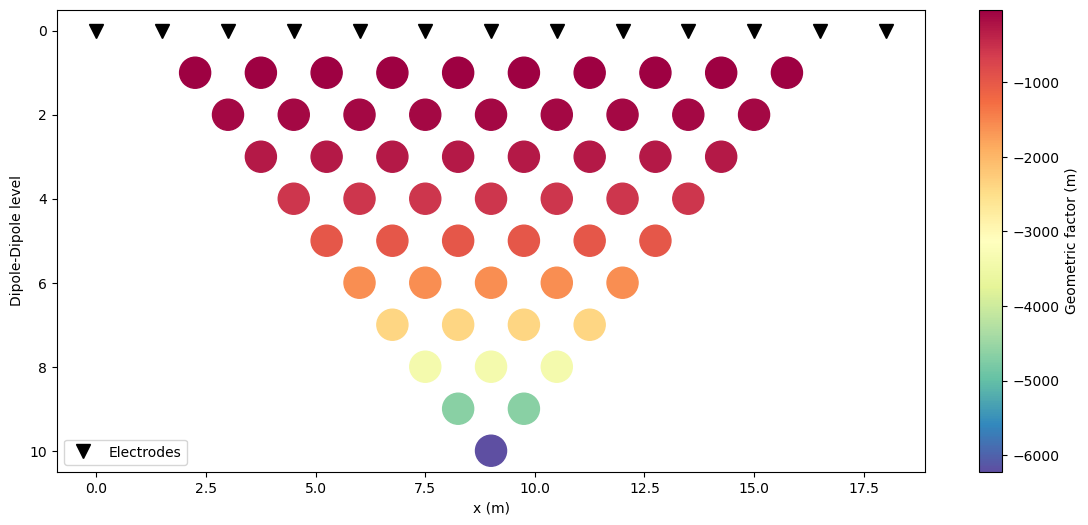

In [10]:
plt.figure(figsize=(14,6))
plt.scatter(midpoint, level, c=K, cmap="Spectral_r", s=500)
plt.plot(elecs, np.zeros_like(elecs), 'kv', ms=10, label="Electrodes")
plt.gca().invert_yaxis()
plt.ylabel("Dipole-Dipole level")
plt.xlabel("x (m)")
plt.legend()
plt.colorbar(label="Geometric factor (m)")

## **Addon**: Answer using pyGIMLi

04/06/24 - 09:51:38 - pyGIMLi - INFO - Cache /Users/fwagner/git/gimli_dev/source/pygimli/physics/ert/ert.py:createGeometricFactors restored (0.0s x 6): /Users/fwagner/Library/Caches/pygimli/9741181157803619132


(<Axes: >, <matplotlib.colorbar.Colorbar at 0x1175d6fb0>)

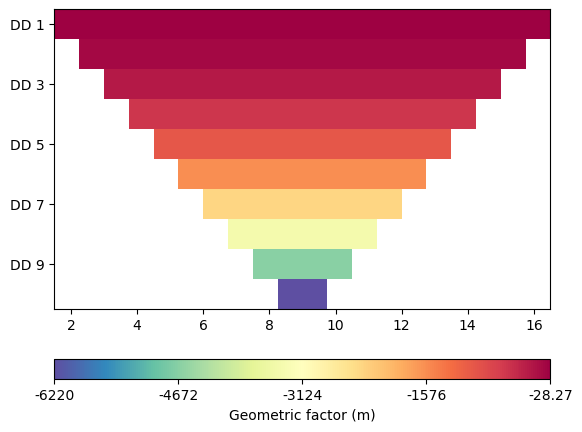

In [11]:
from pygimli.physics import ert

scheme = ert.createData(elecs=elecs, schemeName='dd')
k = ert.createGeometricFactors(scheme).array()
ert.showERTData(scheme, k, logScale=False, label="Geometric factor (m)")